In [ ]:
!pip install PyGithub
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from github import Github
import github
matplotlib.style.use('seaborn')
%matplotlib inline

     |████████████████████████████████| 291 kB 7.9 MB/s 
     |████████████████████████████████| 961 kB 42.9 MB/s 


In [ ]:
pd.set_option("display.precision", 3)
Models=['CNN','MLP','LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
from IPython.display import display
for model in Models:
  print(model+' model')
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+".csv").drop(columns =["Unnamed: 0"])
  df=df[df['State']!='Delhi']
  #print(df.head())
  temp1=df.groupby(['State']).apply(lambda df: df.loc[df.RMSE.idxmin()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  display(temp1)
  temp1=temp1.sort_values(["State"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae[model]=list(temp1['MAE'])
  rmse[model]=list(temp1['RMSE'])
  states=list(temp1['State'])
  

CNN model


,State,Number_feature,Time_Step,number_layers,kernel_size,MAE,RMSE,R2_Score
0,Karnataka,2,7,2,1,0.016,0.018,0.994
1,Kerala,1,30,3,2,0.016,0.018,0.986
2,Maharashtra,1,30,2,2,0.006,0.006,0.993
3,Tamil-Nadu,2,30,3,4,0.028,0.031,0.972
4,Uttar-Pradesh,2,30,2,2,0.019,0.020,0.947


MLP model


,State,Number_feature,Time_Step,number_layers,MAE,RMSE,R2_Score
0,Karnataka,1,5,2,0.074,0.083,0.875
1,Kerala,4,7,2,0.054,0.064,0.911
2,Maharashtra,3,30,2,0.024,0.026,0.880
3,Tamil-Nadu,1,7,2,0.069,0.087,0.857
4,Uttar-Pradesh,1,5,2,0.056,0.062,0.928


LSTM model


,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Karnataka,5,5,1,1,0.038,0.055,0.946
1,Kerala,1,15,1,1,0.022,0.025,0.984
2,Maharashtra,1,5,1,8,0.006,0.007,0.998
3,Tamil-Nadu,5,5,1,1,0.030,0.041,0.969
4,Uttar-Pradesh,5,5,1,1,0.025,0.034,0.979


GRU model


,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Karnataka,1,5,1,32,0.093,0.105,0.800
1,Kerala,1,7,1,16,0.056,0.068,0.898
2,Maharashtra,1,7,1,16,0.004,0.005,0.999
3,Tamil-Nadu,1,5,1,16,0.053,0.068,0.915
4,Uttar-Pradesh,1,5,1,16,0.073,0.081,0.877


In [ ]:
state_df=pd.DataFrame({'State':states})
r2_score_df = pd.DataFrame(r2_scores)
mae_df = pd.DataFrame(mae)
rmse_df = pd.DataFrame(rmse)
result= pd.concat([state_df, r2_score_df,mae_df,rmse_df], axis=1)
display(result)

,State,CNN,MLP,LSTM,GRU,CNN,MLP,LSTM,GRU,CNN,MLP,LSTM,GRU
0,Uttar-Pradesh,0.947,0.928,0.979,0.877,0.019,0.056,0.025,0.073,0.020,0.062,0.034,0.081
1,Tamil-Nadu,0.972,0.857,0.969,0.915,0.028,0.069,0.030,0.053,0.031,0.087,0.041,0.068
2,Maharashtra,0.993,0.880,0.998,0.999,0.006,0.024,0.006,0.004,0.006,0.026,0.007,0.005
3,Kerala,0.986,0.911,0.984,0.898,0.016,0.054,0.022,0.056,0.018,0.064,0.025,0.068
4,Karnataka,0.994,0.875,0.946,0.800,0.016,0.074,0.038,0.093,0.018,0.083,0.055,0.105


In [ ]:
print(result.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} &          State &    CNN &    MLP &   LSTM &    GRU &    CNN &    MLP &   LSTM &    GRU &    CNN &    MLP &   LSTM &    GRU \\
\midrule
0 &  Uttar-Pradesh &  0.947 &  0.928 &  0.979 &  0.877 &  0.019 &  0.056 &  0.025 &  0.073 &  0.020 &  0.062 &  0.034 &  0.081 \\
1 &     Tamil-Nadu &  0.972 &  0.857 &  0.969 &  0.915 &  0.028 &  0.069 &  0.030 &  0.053 &  0.031 &  0.087 &  0.041 &  0.068 \\
2 &    Maharashtra &  0.993 &  0.880 &  0.998 &  0.999 &  0.006 &  0.024 &  0.006 &  0.004 &  0.006 &  0.026 &  0.007 &  0.005 \\
3 &         Kerala &  0.986 &  0.911 &  0.984 &  0.898 &  0.016 &  0.054 &  0.022 &  0.056 &  0.018 &  0.064 &  0.025 &  0.068 \\
4 &      Karnataka &  0.994 &  0.875 &  0.946 &  0.800 &  0.016 &  0.074 &  0.038 &  0.093 &  0.018 &  0.083 &  0.055 &  0.105 \\
\bottomrule
\end{tabular}



In [ ]:
def radar_chart(categories,CNN,MLP,LSTM,GRU,title):
  categories = [*categories, categories[0]]
  CNN = [*CNN, CNN[0]]
  MLP = [*MLP, MLP[0]]
  LSTM = [*LSTM, LSTM[0]]
  #BLSTM = [*BLSTM, BLSTM[0]]
  GRU = [*GRU, GRU[0]]
  N=len(LSTM)-1
  angle=[n/float(N)*2*3.14 for n in range(N)]
  angle+=angle[:1]
  plt.figure(figsize=(8, 8))
  
  plt.polar(angle,CNN,label='CNN',color='g')
  plt.polar(angle,MLP,label='MLP',color='r')
  plt.polar(angle,LSTM,label='LSTM',color='blue')
  #plt.polar(angle,BLSTM,label='BLSTM',color='purple')
  plt.polar(angle,GRU,label='GRU',color='black')
  plt.xticks(angle,labels=categories[:-1])
  plt.yticks()
  plt.title("Radar Chart:"+title,size=20)
  plt.legend()
  plt.savefig(title+'.pdf')  

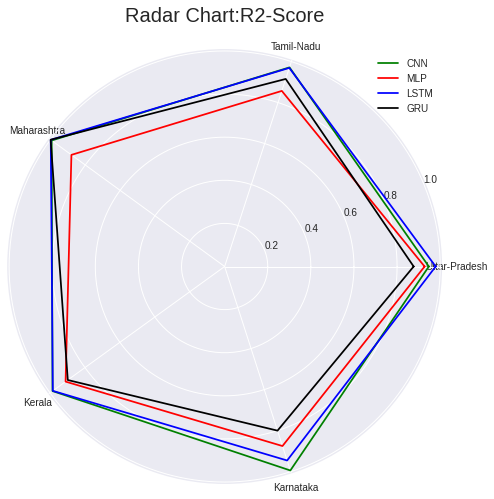

In [ ]:
radar_chart(states,r2_scores['CNN'],r2_scores['MLP'],r2_scores['LSTM'],r2_scores['GRU'],title="R2-Score")

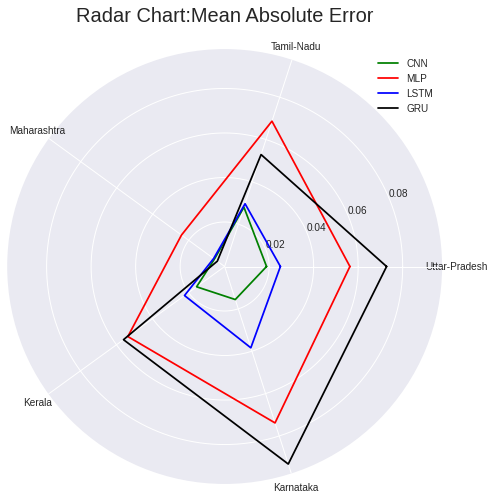

In [ ]:
radar_chart(states,mae['CNN'],mae['MLP'],mae['LSTM'],mae['GRU'],title="Mean Absolute Error")

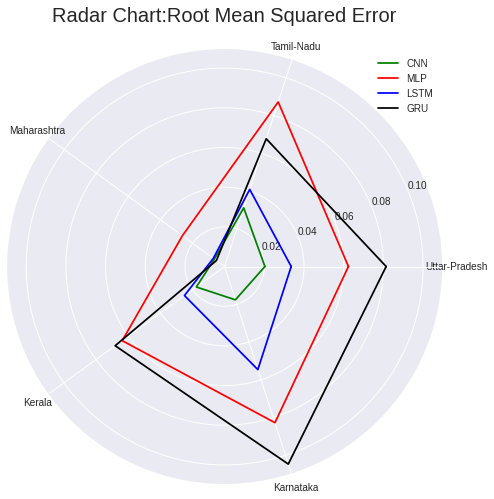

In [ ]:
radar_chart(states,rmse['CNN'],rmse['MLP'],rmse['LSTM'],rmse['GRU'],title="Root Mean Squared Error")